In [4]:
from tifffile import imread, imwrite
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch

In [2]:
test_data = imread("/group/jug/Sheida/pancreatic beta cells/download/high_c1/contrastive/patches/test_data.tif")
test_label = imread("/group/jug/Sheida/pancreatic beta cells/download/high_c1/contrastive/patches/test_label.tif")
print(test_label.shape)
print(test_data.shape)

(4773, 64, 64)
(4773, 64, 64)


In [14]:
patch_size = 64
centre_size = 4
count = [[],[],[]]
for index in range(len(test_data)):
    temp = int((patch_size-centre_size)/2)
    # plt.figure(figsize=(18, 18))
    # plt.subplot(2,2,1)
    # plt.imshow(test_data[index][temp:temp+centre_size,temp:temp+centre_size])
    # plt.subplot(2,2,2)
    # plt.imshow(test_label[index][temp:temp+centre_size,temp:temp+centre_size])
    # plt.subplot(2,2,3)
    # plt.imshow(test_data[index])
    # plt.gca().add_patch(Rectangle((temp-0.5,temp-0.5),centre_size,centre_size,linewidth=2,edgecolor='r',facecolor='none'))
    # plt.subplot(2,2,4)
    # plt.imshow(test_label[index])
    # plt.gca().add_patch(Rectangle((temp-0.5,temp-0.5),centre_size,centre_size,linewidth=2,edgecolor='r',facecolor='none'))
    if len(np.unique(test_label[index][temp:temp+centre_size,temp:temp+centre_size])) == 1:
        # plt.text(temp+0.5, temp+2, str(test_label[index][temp,temp]), color="w")
        if test_label[index][temp,temp] == 1:
            count[0].append(index)
        elif test_label[index][temp,temp] == 2:
            count[1].append(index)
        elif test_label[index][temp,temp] == 3:
            count[2].append(index)
count[1].remove(count[1][0])
count[2].remove(count[2][0])
print(count[0],"\n",count[1],"\n",count[2])

[1, 2, 3, 11, 23, 24, 27, 28, 32, 132, 133, 134, 135, 252, 253, 254, 255, 256, 257, 258, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 124

In [19]:
print(len(count[0]),len(count[1]),len(count[2]))

738 1120 1050


In [22]:
for index in count[2]:
    imwrite(f"/group/jug/Sheida/pancreatic beta cells/download/high_c1/contrastive/patches/3/{index}.tif", test_data[index])

In [ ]:
738, 1121, 1051

In [31]:
import torch
x = 30
input = torch.tensor([10001])
print(torch.clip(input, max=10000))

tensor([10000])


In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [2]:
def distance(model, z1, z2):
    output1 = np.zeros((160, 4, 4))
    output2 = np.zeros((160, 4, 4))
    model.mode_pred=True
    model.eval()
    model.to(device)
    z1 = z1.view(1,1,patch_size,patch_size)
    z1 = z1.to(device=device, dtype=torch.float)
    z2 = z2.view(1,1,patch_size,patch_size)
    z2 = z2.to(device=device, dtype=torch.float)
    with torch.no_grad():
            sample1 = model(z1, y=z1)
            mu1 = sample1['mu']
            output1[:32] = mu1[0][0].cpu().numpy()[:,14:18,14:18]
            output1[32:64] = mu1[1][0].cpu().numpy()[:,6:10,6:10]
            output1[64:96] = mu1[2][0].cpu().numpy()[:,2:6,2:6]
            output1[96:128] = mu1[3][0].cpu().numpy()
            output1[128:160] = mu1[4][0].cpu().numpy().repeat(2,axis=1).repeat(2,axis=2)
            output1 = output1.T.reshape(-1,160)
            sample2 = model(z2, y=z2)
            mu2 = sample2['mu']
            output2[:32] = mu2[0][0].cpu().numpy()[:,14:18,14:18]
            output2[32:64] = mu2[1][0].cpu().numpy()[:,6:10,6:10]
            output2[64:96] = mu2[2][0].cpu().numpy()[:,2:6,2:6]
            output2[96:128] = mu2[3][0].cpu().numpy()
            output2[128:160] = mu2[4][0].cpu().numpy().repeat(2,axis=1).repeat(2,axis=2)
            output2 = output2.T.reshape(-1,160)
            return torch.mean(torch.sqrt(((output1-output2)**2).sum(axis=1)))

In [10]:
import sys
print(sys.path[0])
path = "/group/jug/Sheida/HDN_models/22022024/Trained_model_1/model/"

model = torch.load(path+"Contrastive_MAE_best_vae.net")


/home/sheida.rahnamai/GIT/HDN/examples/Pixel_Noise/Convallaria


ModuleNotFoundError: No module named 'models'

In [4]:
golgis = imread("/group/jug/Sheida/pancreatic beta cells/download/high_c1/contrastive/patches/golgi/*.tif")
model = torch.load("/group/jug/Sheida/HDN models/19022024/background added to negative pair/model/Contrastive_MAE_best_vae.net")
golgi_hist = []
plt.imshow(golgis[730])
num_golgi = len(golgis)
for i in range(int(num_golgi/2)):
    golgi_hist.append(distance(model,golgis[i],golgis[num_golgi-i-1]))

ModuleNotFoundError: No module named 'models'

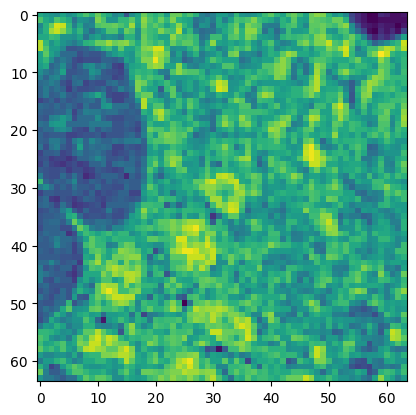

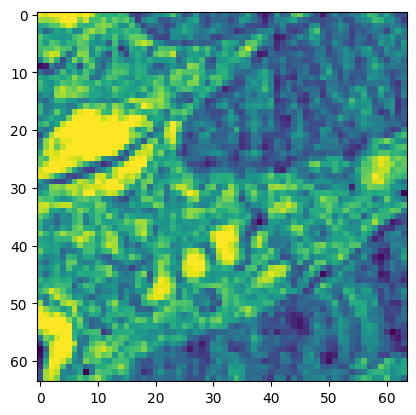

In [52]:
np.random.shuffle(golgis)
plt.imshow(golgis[730])
plt.show()
np.random.shuffle(golgis)
plt.imshow(golgis[730])